# **Project 3: Hamburger/Hotdog**


## **Import the necessary libraries**

In [1]:
from PIL import Image
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


# scikit-learn modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Library for randomly selecting data points
import random

from Utils import plot_training_history, evaluate_model, plot_confusion_matrix, calculate_additional_metrics

## **Load and Prepare the Dataset**

- Load and standardize the dataset
- Extract and encode lables. 
- Split the data into the train and the test dataset.

In [2]:
# Function to Load Images and Labels
# This function walks through the directory structure, loads the images, converts them into a consistent format,
# resizes them as needed and extracts labels from the directory names:

def load_images_from_folder(folder, count, img_size=(256, 256)):
    images = []
    for idx, filename in enumerate(os.listdir(folder)):
        if idx >= count:  # Only load up to 'count' images
            break
        if filename.endswith('.jpg'):  
            img_path = os.path.join(folder, filename)
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Convert to RGB
                img = img.resize(img_size)  # Resize the image
                images.append(np.array(img))
    return np.array(images)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [4]:
# Load Images and Create Labels
hotdog_folder = '/Users/jenniferleone/Desktop/AI_Bootcamp/Project 3/Images/HOTDOG'
hamburger_folder = '/Users/jenniferleone/Desktop/AI_Bootcamp/Project 3/Images/HAMBURGER'

# hotdog_folder = "/content/drive/MyDrive/IMAGES/HOTDOG_SOURCE"
# hamburger_folder = "/content/drive/MyDrive/IMAGES/HAMBURGER_SOURCE"

# Load images
hotdog_images = load_images_from_folder(hotdog_folder,1000)
hamburger_images = load_images_from_folder(hamburger_folder,1000)

# Create labels (zeros and ones for the hotdog and notdog images)
hotdog_labels = np.ones(len(hotdog_images))
hamburger_labels = np.zeros(len(hamburger_images))

# Combine images and labels
X = np.concatenate((hotdog_images, hamburger_images), axis=0)
y = np.concatenate((hotdog_labels, hamburger_labels), axis=0)

In [5]:
print(len(hamburger_images))
print(len(hotdog_images))  

1000
1000


In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

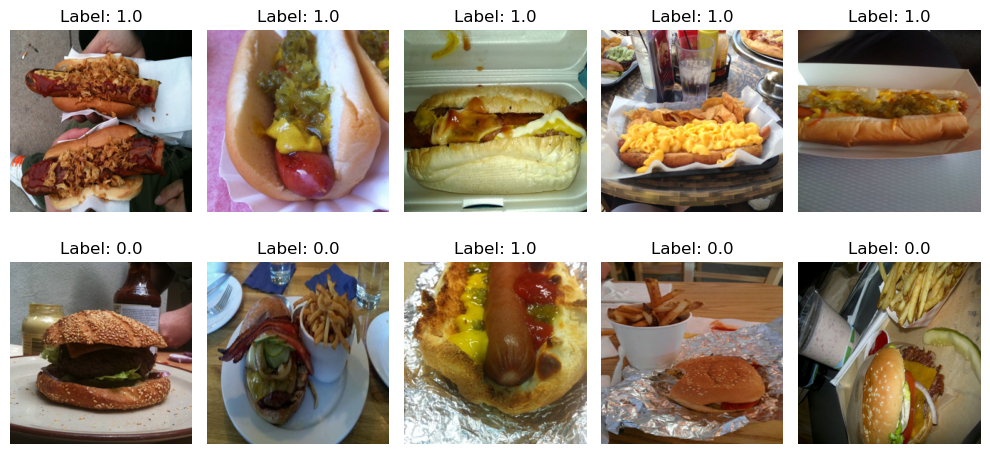

In [7]:
# Visualize the first 10 images in the dataset and printing their classification labels

def plot_images(images, labels, num_images=10):
    # Set up the figure size in inches
    plt.figure(figsize=(10, 5))
    
    for i in range(num_images):
        # Create a subplot for each image
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')  # Turn off axis numbering
        
    plt.tight_layout()
    plt.show()

plot_images(X_train, y_train)


## **Data preparation**
- Normalize the train and the test dataset by dividing by 255.

In [8]:
# Normalizing the image pixel inputs
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# Displaying the first normalized training image
print('Test Dataset:', X_test.shape, y_test.shape)
print('Training Dataset:', X_train.shape, y_train.shape)

Test Dataset: (400, 256, 256, 3) (400,)
Training Dataset: (1600, 256, 256, 3) (1600,)


In [10]:
# Displaying the first normalized testing image and its pixel values
print("Shape of the first normalized testing image:", X_test[0].shape)
print("Pixel values of the first normalized testing image:")
print(X_test[0])

Shape of the first normalized testing image: (256, 256, 3)
Pixel values of the first normalized testing image:
[[[0.08627451 0.0627451  0.01176471]
  [0.09019608 0.07058824 0.02352941]
  [0.08235294 0.07843137 0.03137255]
  ...
  [0.08627451 0.04705882 0.02745098]
  [0.09411765 0.04705882 0.03921569]
  [0.10588235 0.05098039 0.04313725]]

 [[0.11372549 0.08627451 0.04313725]
  [0.06666667 0.05098039 0.01176471]
  [0.05882353 0.05490196 0.01568627]
  ...
  [0.09019608 0.03529412 0.01960784]
  [0.08627451 0.03137255 0.01568627]
  [0.09019608 0.03529412 0.01960784]]

 [[0.20784314 0.18823529 0.14901961]
  [0.09803922 0.08235294 0.05098039]
  [0.03921569 0.03137255 0.00784314]
  ...
  [0.1372549  0.0627451  0.04313725]
  [0.10196078 0.03529412 0.01176471]
  [0.07058824 0.01960784 0.        ]]

 ...

 [[0.00392157 0.01176471 0.00392157]
  [0.00392157 0.00784314 0.        ]
  [0.01568627 0.02352941 0.01176471]
  ...
  [0.01568627 0.02352941 0.01176471]
  [0.01176471 0.01960784 0.00784314]
  

## **Model Building**

---
### **CNN Model - Iteration #1**

In [11]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [12]:
# Define a CNN model
model_1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
batch_size = 32
epochs = 10
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs
)

/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 221ms/step - accuracy: 0.5764 - loss: 2.7122 - val_accuracy: 0.6700 - val_loss: 0.6564
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.8246 - loss: 0.4261 - val_accuracy: 0.6925 - val_loss: 0.6447
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.9333 - loss: 0.1934 - val_accuracy: 0.6825 - val_loss: 0.6861
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.9843 - loss: 0.0730 - val_accuracy: 0.6250 - val_loss: 0.9901
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.9964 - loss: 0.0499 - val_accuracy: 0.5550 - val_loss: 1.3968
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.9733 - loss: 0.1020 - val_accuracy: 0.6300 - val_loss: 0.8714
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.9797 - loss: 0.0871 - val_accuracy: 0.6550 - val_loss: 1.0471
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.9984 - loss: 0.0236 - val_accu

In [13]:
# Evaluating on the Test dataset
evaluate_model(model_1, X_test, y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6764 - loss: 1.1971
Test Loss: 1.152781367301941
Test Accuracy: 0.6600000262260437


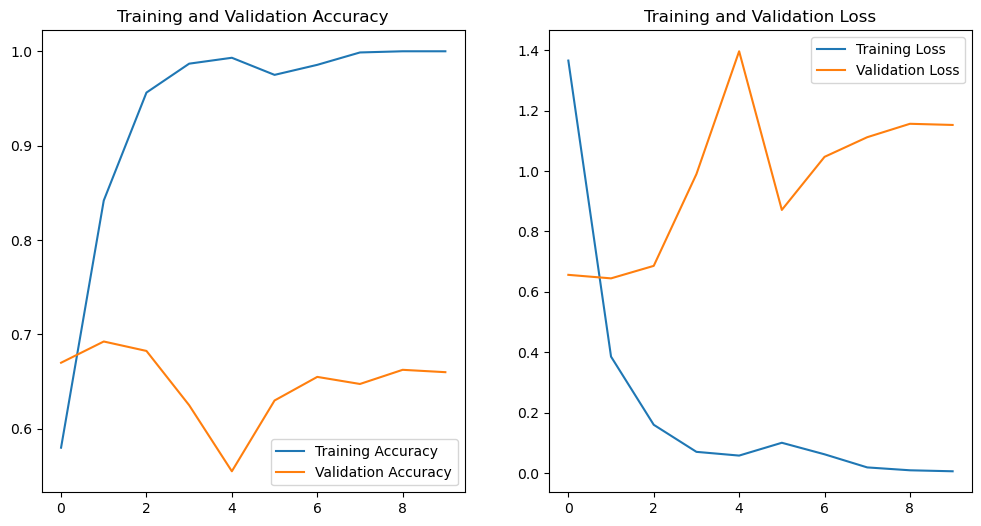

In [14]:
# Accuracy and Loss Plots
plot_training_history(history_1)

In [15]:
# Make Predictions
y_pred = model_1.predict(X_test)

# Convert probabilities to binary labels based on a 0.5 threshold
y_pred_labels = (y_pred > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [16]:
# Plot Confusion Matrix
plot_confusion_matrix(model_1, X_test, y_pred_labels,['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #2**

### Augmentation

In [17]:
# Apply augmentation to the whole training dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (degrees)
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    shear_range=0.2,        # Shear intensity
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    vertical_flip=False,    # No vertical flip for face images
    fill_mode='nearest'     # Fill mode for handling newly created pixels
)

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images.
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]
    
    # Ensure that the input data has the correct shape (Add batch dimension)
    img = np.expand_dims(img, axis=0)

    # Create the iterator
    it = datagen.flow(img, batch_size=1)

    # Add 5 augmented images for every original image
    for j in range(5):
        # Append a new image to the X list
        X_train_aug.append(next(it)[0])  # Correctly use next() with the iterator
        # Append the label for the original image to the y list
        y_train_aug.append(label)

# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))


8000
8000


In [18]:
# Convert lists to numpy arrays
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

# Ensure X_train_aug is a 4D array and y_train_aug is a 1D array
print("X_train_aug shape:", X_train_aug.shape)
print("y_train_aug shape:", y_train_aug.shape)


X_train_aug shape: (8000, 256, 256, 3)
y_train_aug shape: (8000,)


In [19]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [20]:
# Define CNN model_2
model_2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
batch_size = 32
epochs = 10
history_2 = model_2.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 208ms/step - accuracy: 0.6037 - loss: 1.1343 - val_accuracy: 0.6300 - val_loss: 0.6456
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 199ms/step - accuracy: 0.7474 - loss: 0.5327 - val_accuracy: 0.6450 - val_loss: 0.7328
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 574ms/step - accuracy: 0.8678 - loss: 0.3236 - val_accuracy: 0.6350 - val_loss: 1.0630
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 177s 710ms/step - accuracy: 0.9242 - loss: 0.2081 - val_accuracy: 0.6175 - val_loss: 1.1942
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 208ms/step - accuracy: 0.9654 - loss: 0.1082 - val_accuracy: 0.6300 - val_loss: 1.4143
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 0.9766 - loss: 0.0802 - val_accuracy: 0.6075 - val_loss: 1.8296
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 0.9695 - loss: 0.0947 - val_accuracy: 0.5750 - val_loss: 2.0289
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.9801 - loss: 0

In [21]:
# Evaluating on the Test dataset
evaluate_model(model_2, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6049 - loss: 2.8605
Test Loss: 2.822462558746338
Test Accuracy: 0.6000000238418579


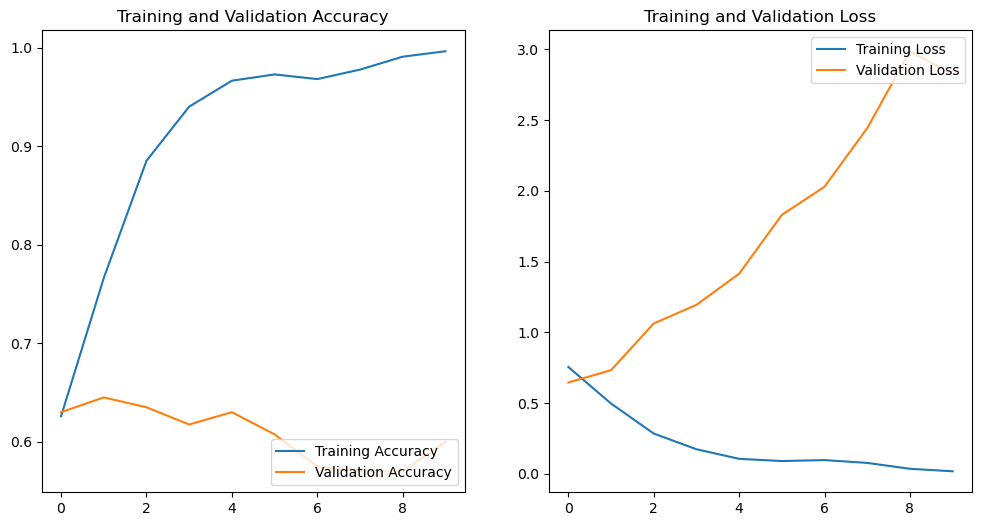

In [22]:
# Accuracy and Loss Plots
plot_training_history(history_2)

In [23]:
# Plot Confusion Matrix
plot_confusion_matrix(model_2, X_test, y_pred_labels,['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #3**

### Dropout
Dropout is a technique where randomly selected neurons are ignored during training, reducing the chance of overfitting. 

In [24]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [25]:
from tensorflow.keras.layers import Dropout

# Define CNN model_3 with Dropout

model_3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout layer after first dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Train the model
batch_size = 32
epochs = 10
history_3 = model_3.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 224ms/step - accuracy: 0.5652 - loss: 1.1542 - val_accuracy: 0.6575 - val_loss: 0.6479
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 210ms/step - accuracy: 0.6481 - loss: 0.6276 - val_accuracy: 0.7150 - val_loss: 0.5922
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.6746 - loss: 0.5845 - val_accuracy: 0.7150 - val_loss: 0.5686
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7279 - loss: 0.5159 - val_accuracy: 0.7000 - val_loss: 0.5641
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 208ms/step - accuracy: 0.7749 - loss: 0.4592 - val_accuracy: 0.6950 - val_loss: 0.6484
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.8101 - loss: 0.3866 - val_accuracy: 0.7000 - val_loss: 0.7033
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.8480 - loss: 0.3125 - val_accuracy: 0.6850 - val_loss: 0.7601
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 225ms/step - accuracy: 0.8667 - loss: 0.2818 

In [27]:
# Evaluating on the Test dataset
evaluate_model(model_3, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6834 - loss: 1.0089
Test Loss: 1.0943669080734253
Test Accuracy: 0.6700000166893005


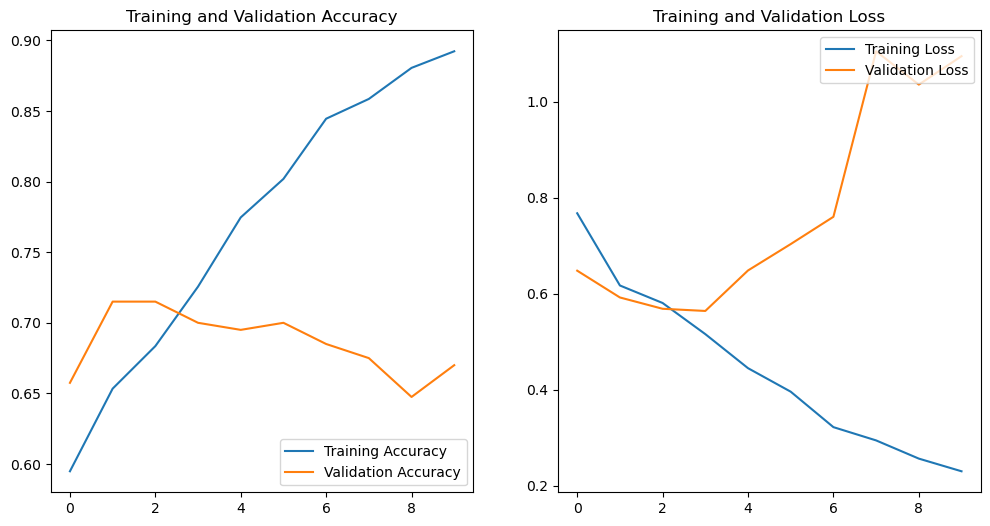

In [28]:
# Accuracy and Loss Plots
plot_training_history(history_3)


In [29]:
# Plot Confusion Matrix
plot_confusion_matrix(model_3, X_test, y_pred_labels,['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #4**

### Early Stopping & Dropout
Early stopping is a method to stop training when the validation metric stops improving, preventing overfitting and saving computational resources.

In [30]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [31]:
# Define a CNN model
model_4 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout layer after first dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

# Fit the model with early stopping
history_4 = model_4.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),  
    epochs=10,  
    callbacks=[early_stopping] 
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 226ms/step - accuracy: 0.5655 - loss: 1.1543 - val_accuracy: 0.6525 - val_loss: 0.6396
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 0.6414 - loss: 0.6297 - val_accuracy: 0.6925 - val_loss: 0.6078
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.6737 - loss: 0.5967 - val_accuracy: 0.6950 - val_loss: 0.6189
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.7193 - loss: 0.5237 - val_accuracy: 0.7075 - val_loss: 0.5909
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.7699 - loss: 0.4608 - val_accuracy: 0.6950 - val_loss: 0.6506
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.8008 - loss: 0.4133 - val_accuracy: 0.6875 - val_loss: 0.6878
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.8304 - loss: 0.3436 - val_accuracy: 0.6975 - val_loss: 0.7484
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [33]:
# Evaluating on the Test dataset
evaluate_model(model_4, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7438 - loss: 0.5530
Test Loss: 0.5908856391906738
Test Accuracy: 0.7074999809265137


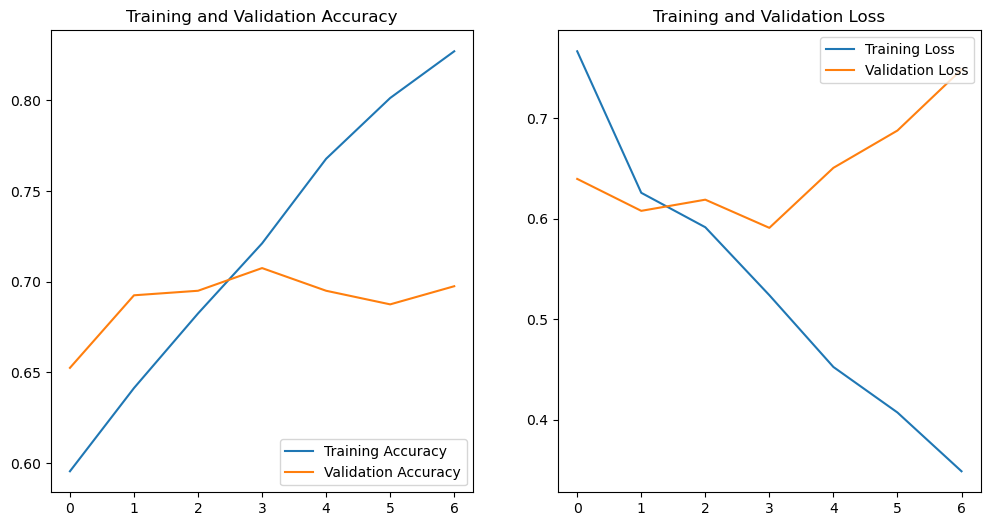

In [34]:
# Accuracy and Loss Plots
plot_training_history(history_4)

In [35]:
# Plot Confusion Matrix
plot_confusion_matrix(model_4, X_test, y_pred_labels,['Hamburger', 'Hotdog'])

In [ ]:
# Define a CNN model
model_4a = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout layer after first dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_4a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the model without early stopping
train_model(model_4a, X_train, y_train, X_test, y_test)

### **CNN Model - Iteration #5**

### Additional Layers, Increasing Neurons, Adding Batch Normalization Layers, Early Stopping & Dropout

In [36]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [37]:
# Define a CNN model
model_5 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

# Fit the model with early stopping
history_5 = model_5.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),  
    epochs=10,  
    callbacks=[early_stopping] 
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 606s 2s/step - accuracy: 0.5815 - loss: 6.4670 - val_accuracy: 0.4975 - val_loss: 66.1172
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.6053 - loss: 0.7953 - val_accuracy: 0.4975 - val_loss: 8.3456
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.6133 - loss: 0.6972 - val_accuracy: 0.5925 - val_loss: 2.8508
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.6081 - loss: 0.6590 - val_accuracy: 0.6925 - val_loss: 0.5718
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 200s 798ms/step - accuracy: 0.6595 - loss: 0.6740 - val_accuracy: 0.7025 - val_loss: 1.0642
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 198s 790ms/step - accuracy: 0.6838 - loss: 0.5652 - val_accuracy: 0.6075 - val_loss: 0.6303
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 197s 786ms/step - accuracy: 0.6724 - loss: 0.5542 - val_accuracy: 0.6150 - val_loss: 0.9935
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [39]:
# Evaluating on the Test dataset
evaluate_model(model_5, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6685 - loss: 0.5963
Test Loss: 0.5717755556106567
Test Accuracy: 0.6924999952316284


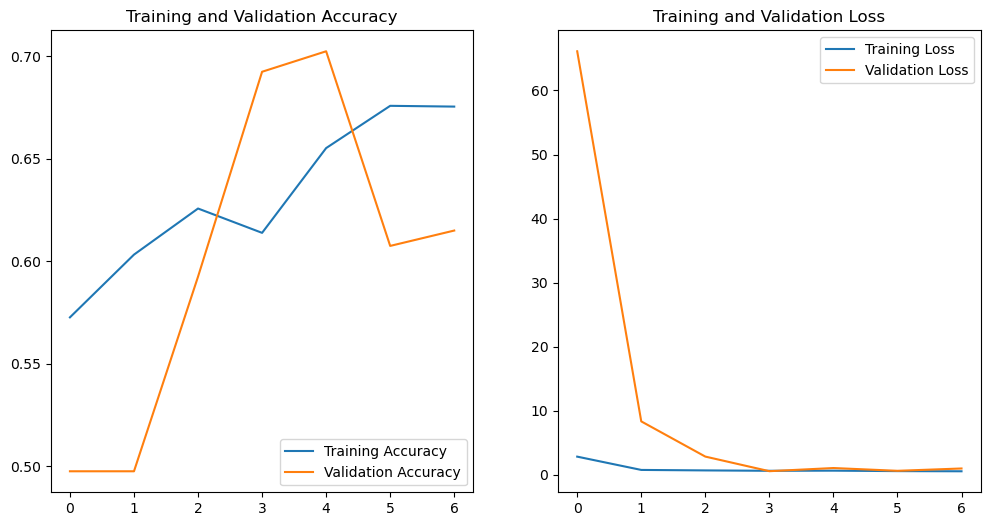

In [40]:
# Accuracy and Loss Plots
plot_training_history(history_5)

In [41]:
# Plot Confusion Matrix
plot_confusion_matrix(model_5, X_test, y_pred_labels,['Hamburger', 'Hotdog'])

### Model Comparison

In [47]:
import pandas as pd

# Sample data structure, replace with your actual history data
data = {
    'Model': [],
    'Training Accuracy': [],
    'Validation Accuracy': [],
    'Training Loss': [],
    'Validation Loss': []
}

# Populate the DataFrame
for i in range(1, 6):
    history = eval(f'history_{i}')
    data['Model'].append(f'Model_{i}')
    data['Training Accuracy'].append(history.history['accuracy'][-1])  # Last epoch accuracy
    data['Validation Accuracy'].append(history.history['val_accuracy'][-1])  # Last epoch val_accuracy
    data['Training Loss'].append(history.history['loss'][-1])  # Last epoch loss
    data['Validation Loss'].append(history.history['val_loss'][-1])  # Last epoch val_loss

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Model,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,Model_1,1.00000,0.6600,0.005822,1.152781
1,Model_2,0.99650,0.6000,0.018536,2.822463
2,Model_3,0.89225,0.6700,0.230443,1.094367
3,Model_4,0.82700,0.6975,0.348568,0.748431
4,Model_5,0.67550,0.6150,0.557458,0.993520


/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

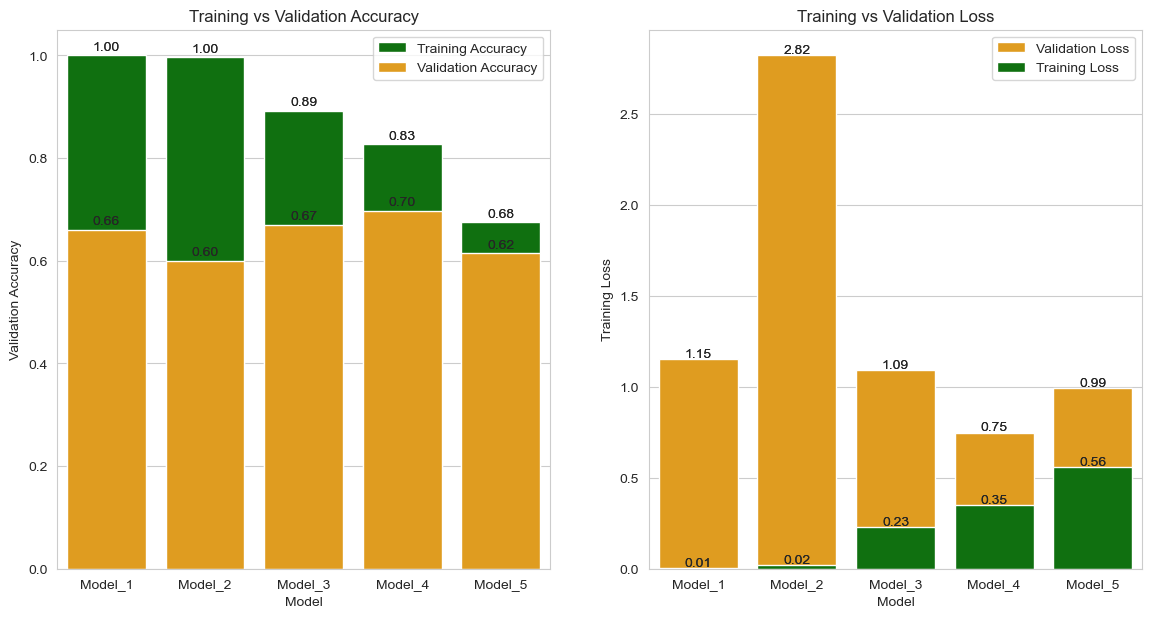

In [66]:
# Plot Model Comparison Chart 

# Set the aesthetic style of the plots
sns.set_style(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 7))

# Plotting Training and Validation Accuracy
plt.subplot(121)  # 1 row, 2 cols, subplot 1
ax1 = sns.barplot(x='Model', y='Training Accuracy', data=df, color='green', label='Training Accuracy')
ax2 = sns.barplot(x='Model', y='Validation Accuracy', data=df, color='orange', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Add numerical values on the bars for Accuracy
for p in ax1.patches + ax2.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:0.2f}'.format(height), ha="center")

# Plotting Training and Validation Loss
plt.subplot(122)  # 1 row, 2 cols, subplot 2
ax3 = sns.barplot(x='Model', y='Validation Loss', data=df, color='orange', label='Validation Loss')
ax4 = sns.barplot(x='Model', y='Training Loss', data=df, color='green', label='Training Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Add numerical values on the bars for Loss
for p in ax3.patches + ax4.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:0.2f}'.format(height), ha="center")

plt.show()

## Save the Trained Model

In [55]:
from pathlib import Path
# Set the model's file path
file_path = Path("/Users/jenniferleone/Desktop/AI_Bootcamp/Project 3/Fantastic_4_Project_3/CNN_Model_4.keras")

# Export your model
model_4.save(file_path)

## Loading a Trained Model

In [51]:
# Load the model to a new object
model_4_imported = tf.keras.models.load_model(file_path)

### Gradio App

In [52]:
import gradio as gr

def classify_image(image):
    # Resize the image to match the input shape of the model
    image = tf.image.resize(image, (256, 256))
    # Scale image pixels to 0-1
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict
    prediction = model_4.predict(image)[0][0]
    
    # Convert prediction to label
    label = "Hotdog" if prediction > 0.5 else "Hamburger"
    return label
    
# Adjust Gradio interface accordingly
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(), 
    outputs="text",
    title="Hamburger or Hotdog Classifier",
    description="Upload an image to see if it's a hamburger or hotdog."
)

# Launch the interface
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7863
IMPORTANT: You are using gradio version 4.28.3, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://cf6c7cbf352db7a5c6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
